In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', 150, 'display.min_rows', 25)
path= os.getcwd()+"/"

# Introduction:

The main objective of this analysis is to categorize books from Amazon into similar categories using K-means clustering based on the titles of the books. 

To achieve this goal, we performed various preprocessing steps, including removing punctuation and stop words and applying stemming to the text. 

Additionally, we conducted some exploratory data analysis to analyze the top books according to their reviews. Finally, we used K-means clustering to categorize the books into similar categories.

# Methodology:
To begin the analysis, we loaded the dataset using Pandas and extracted the relevant information using regular expressions. 

Next, we removed the punctuation, stop words, and applied preprocessing using the count vectorizer and TF-IDF transformer. 

Then we used K-means to cluster and categorize the books. We preprocessed the data using various techniques, including stop word removal and stemming.

We dropped missing data and filtered out non-English books. We also removed unnecessary columns from the dataset. 

Additionally, we conducted exploratory data analysis to analyze the distribution of books according to their reviews, price, and pages. We created a new dataset that includes only books with more than 1,000 reviews.

We examined the relationship between the number of reviews and price and found that more expensive books do not necessarily have more reviews. We also examined the relationship between the number of reviews and the average rating and found that all books with more than 1,000 reviews have an average rating of over 4.3.

To clean the publisher column, we removed semicolons, parentheses, and other unnecessary characters. We also removed stopwords from the title and converted all titles to lowercase.

In the end we preprocess our text data into numeric features using Count Vectoriser and tfidtransformer.

CountVectorizer is a text pre-processing technique used to convert strings into a matrix of word counts. It creates a sparse matrix where each row represents a document and each column represents a unique word in the corpus. The cells contain the frequency of each word in the document. CountVectorizer is a useful tool for feature extraction in natural language processing tasks such as text classification.

TfidfTransformer is a normalization technique that is applied on the output of CountVectorizer. It transforms the raw count matrix into a matrix of normalized term frequency-inverse document frequency (tf-idf) values. Tf-idf reflects the importance of a word in a document relative to its importance in the corpus. This helps to account for the fact that some words, such as stop words, may be frequent in many documents and therefore not very informative for classification. TfidfTransformer is often used as a feature extraction step in machine learning algorithms for text classification and information retrieval.

# Load data

In [2]:
df0= pd.read_csv(path+"final_book_dataset_kaggle.csv")
df0.head(3)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          946 non-null    object 
 1   author         824 non-null    object 
 2   price          944 non-null    float64
 3   pages          934 non-null    float64
 4   avg_reviews    823 non-null    float64
 5   n_reviews      946 non-null    int64  
 6   star5          946 non-null    float64
 7   star4          946 non-null    float64
 8   star3          946 non-null    float64
 9   star2          946 non-null    float64
 10  star1          946 non-null    float64
 11  dimensions     914 non-null    object 
 12  weight         943 non-null    object 
 13  language       943 non-null    object 
 14  publisher      942 non-null    object 
 15  ISBN_13        945 non-null    object 
 16  link           946 non-null    object 
 17  complete_link  946 non-null    object 
dtypes: float64

# Data preparaion

## Drop missing data

In [4]:
df0.isnull().sum()

title              0
author           122
price              2
pages             12
avg_reviews      123
n_reviews          0
star5              0
star4              0
star3              0
star2              0
star1              0
dimensions        32
weight             3
language           3
publisher          4
ISBN_13            1
link               0
complete_link      0
dtype: int64

In [5]:
df0.dropna(inplace=True)

## Filter English book

In [6]:
df0.language.unique()

array(['English', 'Spanish'], dtype=object)

There are 2 kinds of languages in the dataset. Let see more detail.

In [7]:
df0.language.unique(), df0.language.value_counts()

(array(['English', 'Spanish'], dtype=object),
 English    697
 Spanish      1
 Name: language, dtype: int64)

Remove this Spanish book

In [8]:
df0 = df0.query('language == "English"')
df0.head(3)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...


## Remove unneed coloumns 

In [9]:
drop_cols_unneed = ['dimensions','weight','language','ISBN_13',"link", "complete_link"]
df0.drop(drop_cols_unneed, axis=1, inplace=True)
df0.head(3)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,Wiley; 1st edition (April 23 2021)
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,Ace the Data Science Interview (August 16 2021)
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,OReilly Media; 1st edition (July 26 2022)


# Exploratory Data Analysis (EDA)

In [10]:
df0.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,50.499885,429.802009,4.443759,151.096126,0.718737,0.162253,0.067145,0.030488,0.021291
std,36.405928,204.171316,0.401712,535.520196,0.150276,0.105193,0.063193,0.040305,0.033387
min,8.990000,48.000000,1.000000,1.000000,0.110000,0.000000,0.000000,0.000000,0.000000
25%,31.990000,286.000000,4.300000,10.000000,0.620000,0.110000,0.000000,0.000000,0.000000
50%,41.990000,392.000000,4.500000,33.000000,0.720000,0.150000,0.060000,0.020000,0.000000
75%,51.890000,542.000000,4.700000,102.000000,0.800000,0.200000,0.090000,0.040000,0.040000
max,279.950000,1728.000000,5.000000,7563.000000,1.000000,0.630000,0.400000,0.250000,0.230000


Look at the n_reviews column, the standard deviation is very large (~535 reviews).

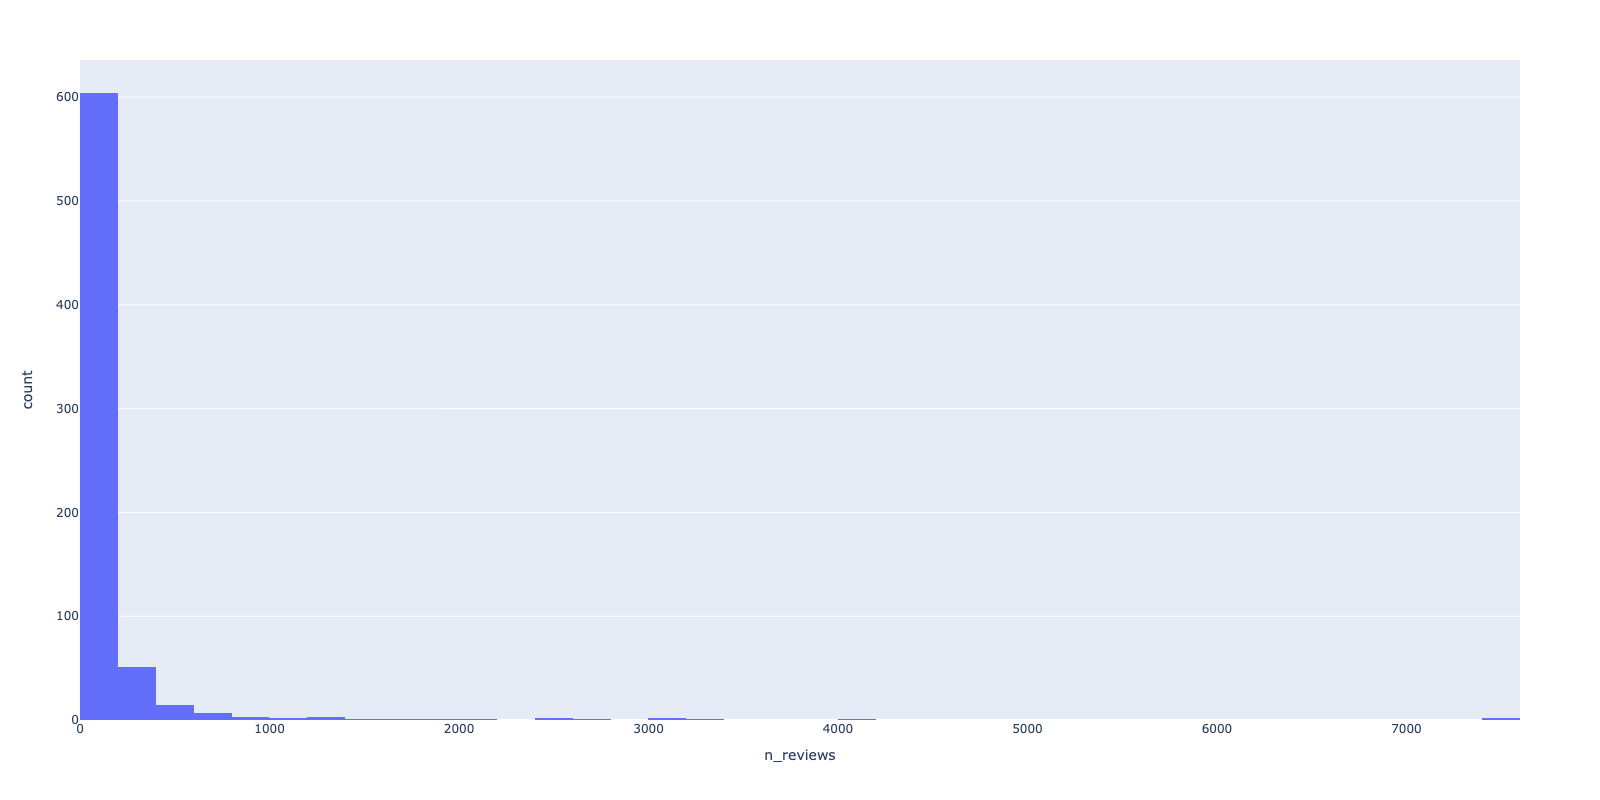

In [11]:
df0.plot.hist(x="n_reviews", width=1600, height= 800, nbins=50).show("png")

## number of books and reviews

We need to create new dataset with books having more than 1000 reviews.

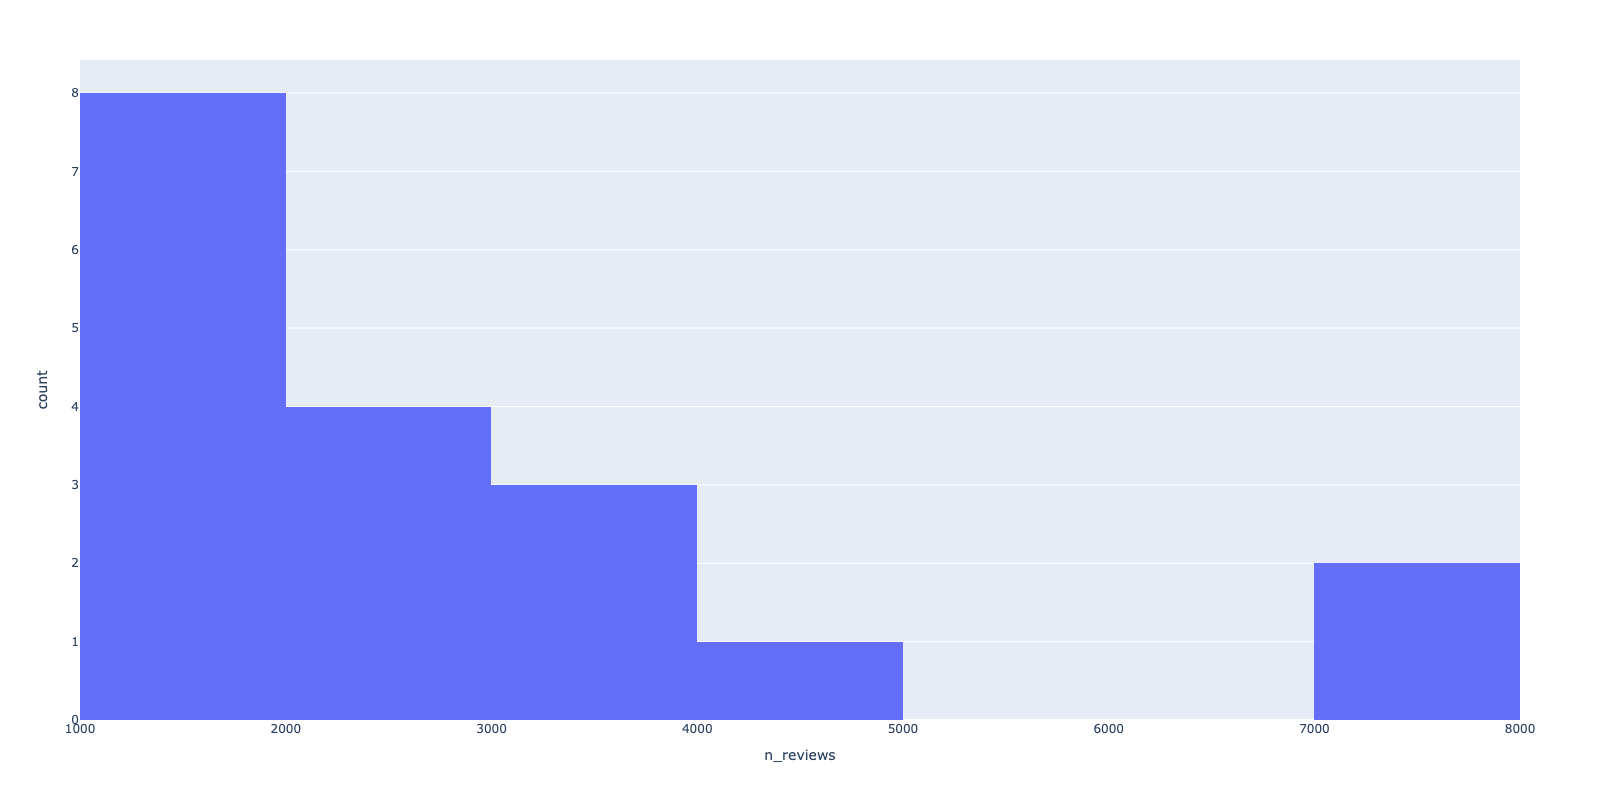

In [12]:
df0.query('n_reviews > 1000').reset_index(drop=True).plot.hist(x="n_reviews", nbins= 10, width=1600, height= 800).show("png")

In [13]:
df0.query('n_reviews > 1000').reset_index(drop=True)

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher
0,The Art of Statistics: How to Learn from Data,[David Spiegelhalter],17.99,448.0,4.6,2764,0.73,0.19,0.05,0.01,0.01,Basic Books (August 17 2021)
1,Designing Data-Intensive Applications: The Big...,[Martin Kleppmann],23.37,611.0,4.8,3167,0.85,0.09,0.03,0.01,0.02,OReilly Media; 1st edition (May 2 2017)
2,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,No Starch Press; 2nd edition (May 3 2019)
3,Cracking the Coding Interview: 189 Programming...,[Gayle Laakmann McDowell],35.95,687.0,4.7,7563,0.81,0.12,0.04,0.01,0.02,CareerCup; 6th edition (July 1 2015)
4,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,OReilly Media; 2nd edition (November 14 2017)
5,Storytelling with Data: A Data Visualization G...,[Cole Nussbaumer Knaflic],28.49,288.0,4.6,3313,0.76,0.15,0.05,0.01,0.02,Wiley; 1st edition (November 2 2015)
6,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,CreateSpace Independent Publishing Platform (A...
7,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,Independently published (April 28 2018)
8,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,Manning; 1st edition (December 22 2017)
9,The Pragmatic Programmer: Your Journey To Mast...,"[David Thomas,Andrew Hunt]",30.26,352.0,4.8,2026,0.85,0.11,0.02,0.01,0.00,Addison-Wesley Professional; 2nd edition (Sept...


There are only 3 books with more than 4000 reviews.

In [14]:
df0.query('n_reviews >= 4000')

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,No Starch Press; 2nd edition (May 3 2019)
127,Cracking the Coding Interview: 189 Programming...,[Gayle Laakmann McDowell],35.95,687.0,4.7,7563,0.81,0.12,0.04,0.01,0.02,CareerCup; 6th edition (July 1 2015)
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,Independently published (April 28 2018)


Top books have number of reviews larger than 1000.

## More expensive books have more reviews?

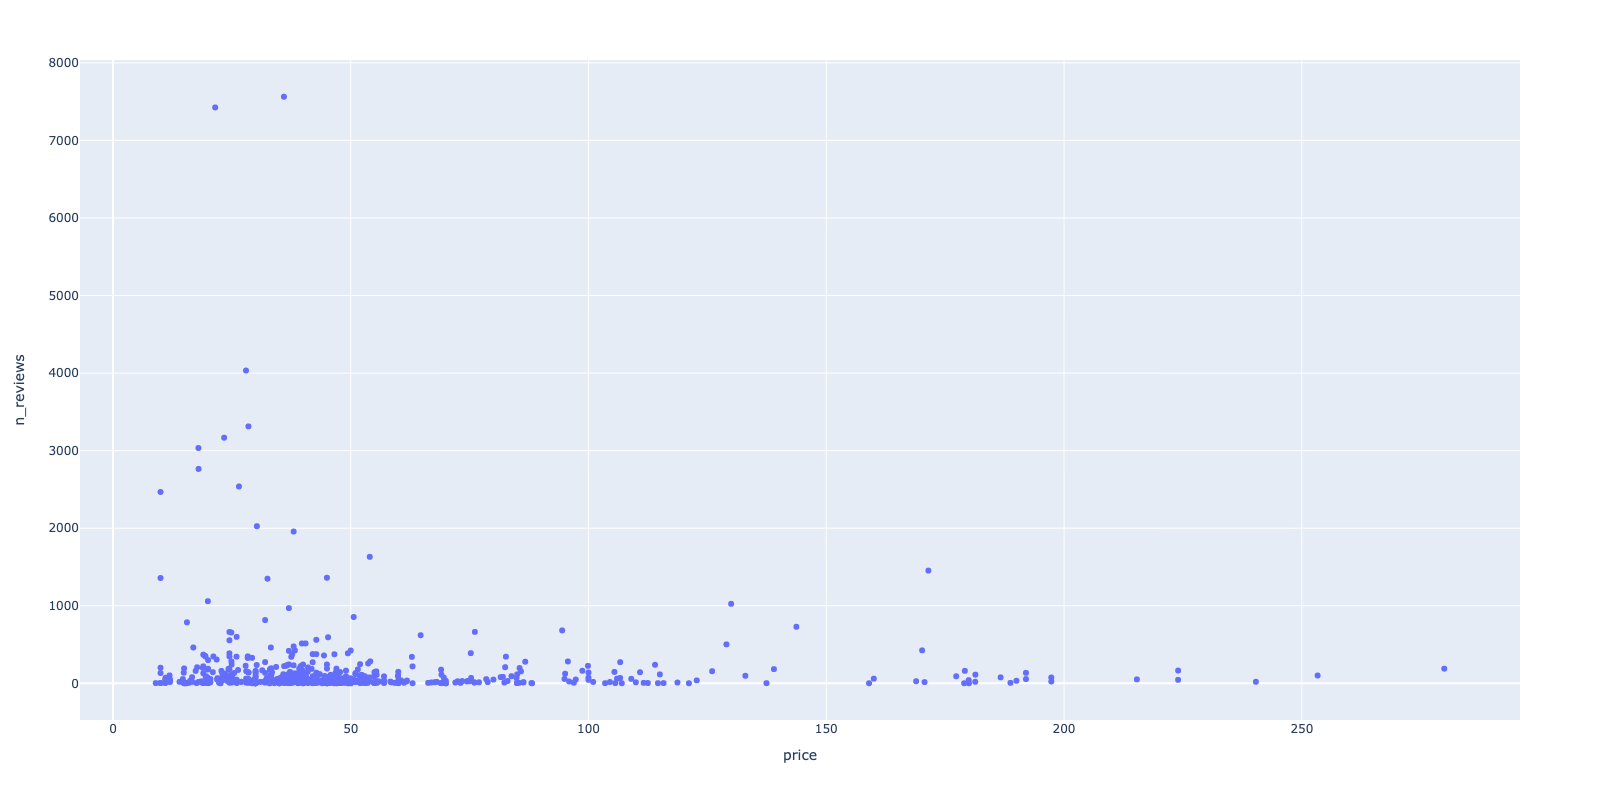

In [15]:
df0.plot.scatter(x='price', y='n_reviews', width=1600, height= 800).show("png")

Most of books with large reviews surround by 0 and 50 price range.

Hence, we can't consider more expensive books as more reviews.

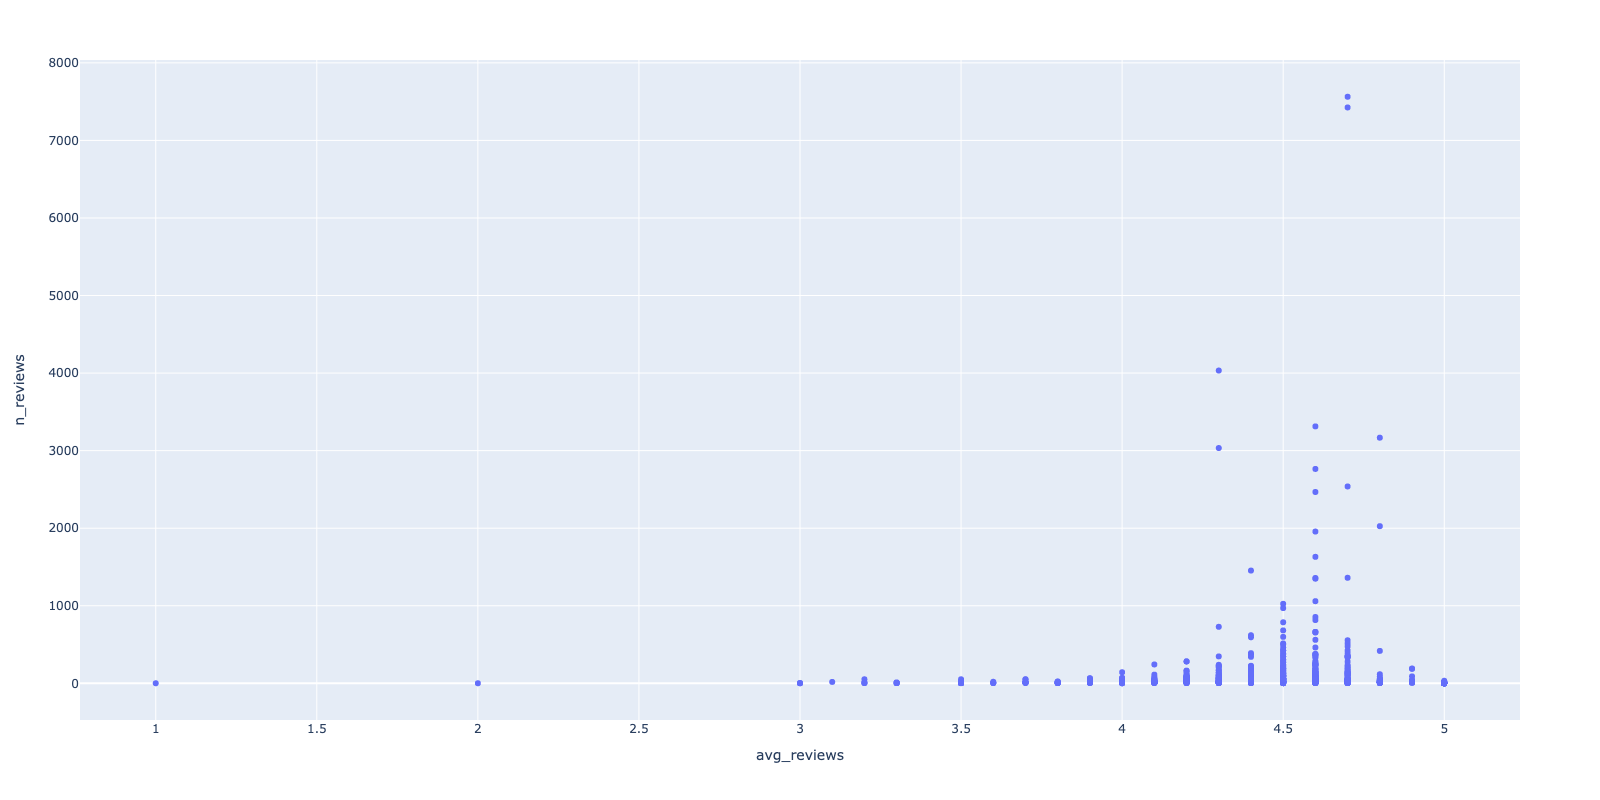

In [16]:
df0.plot.scatter(x='avg_reviews',y='n_reviews', width=1600, height= 800).show("png")

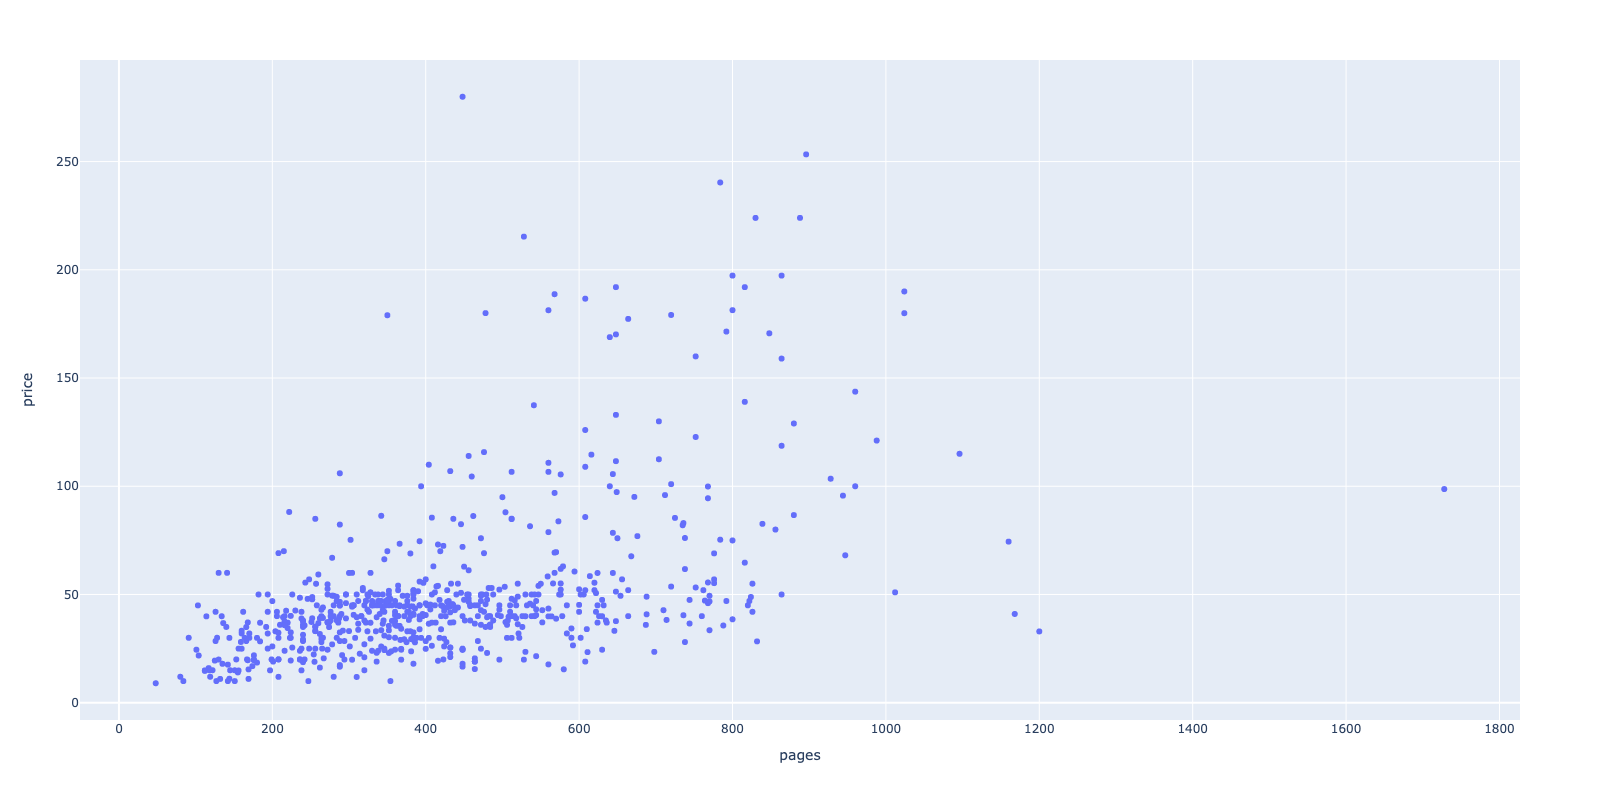

In [17]:
df0.plot.scatter(x='pages', y='price', width=1600, height= 800).show("png")

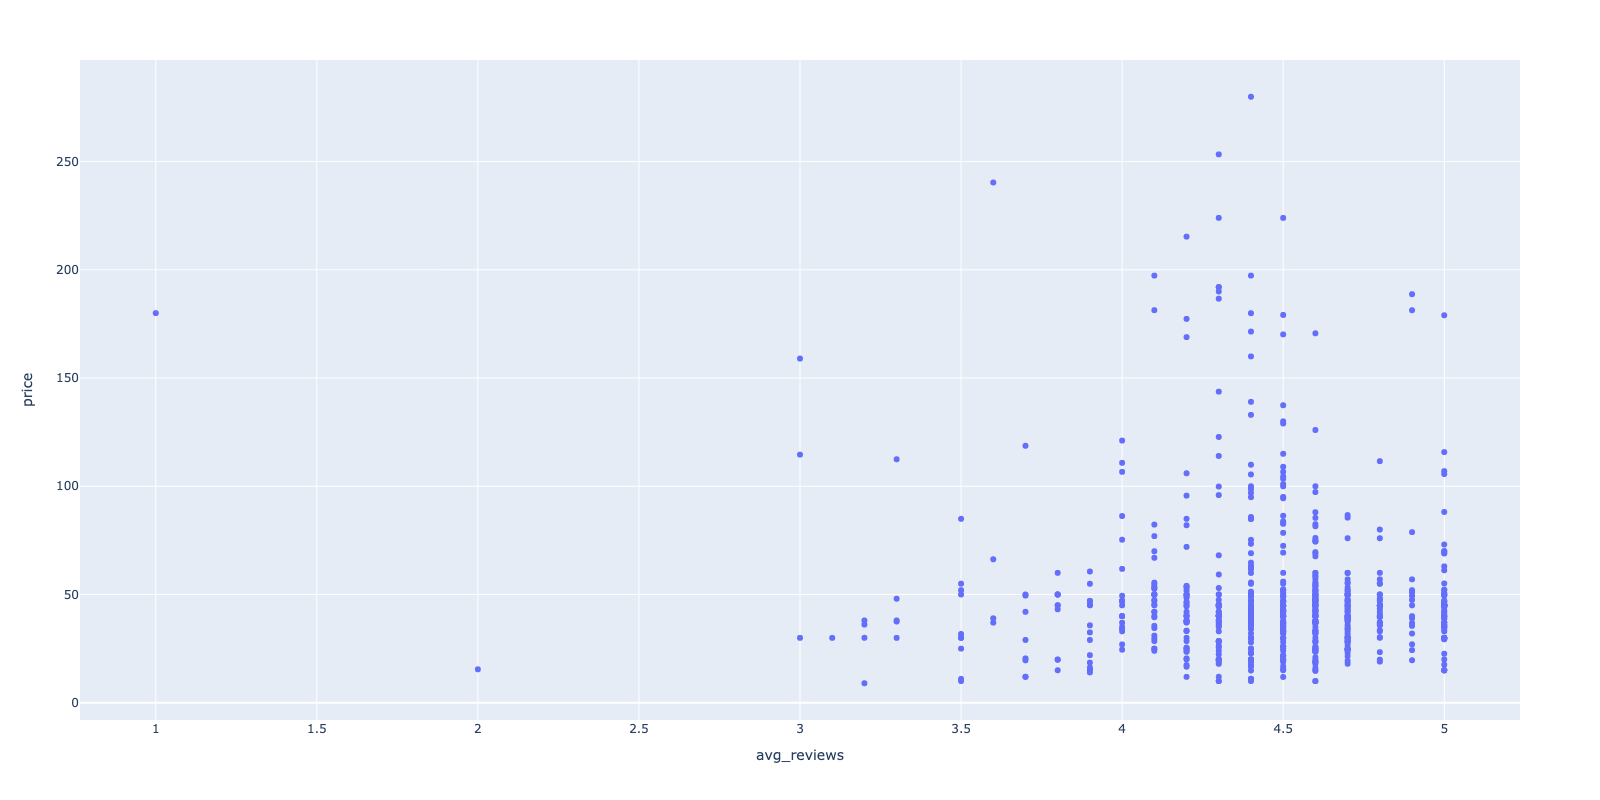

In [18]:
df0.plot.scatter(x= 'avg_reviews',y= 'price', width=1600, height= 800).show("png")

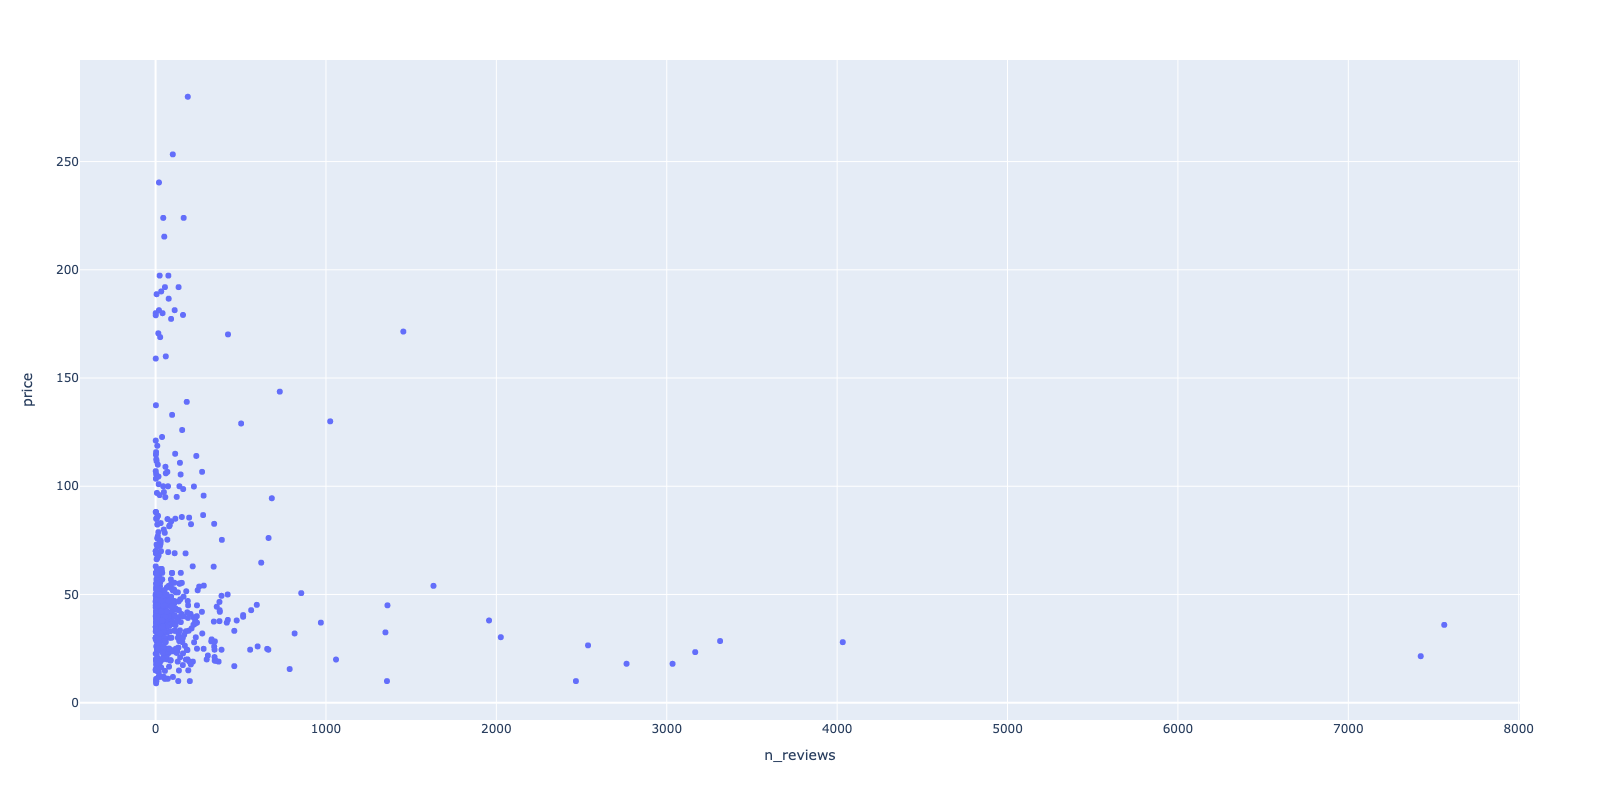

In [19]:
df0.plot.scatter(x='n_reviews',y='price', width=1600, height= 800).show("png")

In [20]:
pd.set_option('display.max_colwidth', True)
df0.query('n_reviews > 1000').sort_values(by="n_reviews",ascending=False).reset_index(drop=True)[['n_reviews','avg_reviews','title']]

,n_reviews,avg_reviews,title
0,7563,4.7,Cracking the Coding Interview: 189 Programming Questions and Solutions
1,7425,4.7,Python Crash Course 2nd Edition: A Hands-On Project-Based Introduction to Programming
2,4033,4.3,Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programming For Intermediates -Python Programming for Advanced (Your place to learn Python with ease)
3,3313,4.6,Storytelling with Data: A Data Visualization Guide for Business Professionals
4,3167,4.8,Designing Data-Intensive Applications: The Big Ideas Behind Reliable Scalable and Maintainable Systems
5,3034,4.3,Python: For Beginners: A Crash Course Guide To Learn Python in 1 Week
6,2764,4.6,The Art of Statistics: How to Learn from Data
7,2538,4.7,Automate the Boring Stuff with Python 2nd Edition: Practical Programming for Total Beginners
8,2467,4.6,Python for Everybody: Exploring Data in Python 3
9,2026,4.8,The Pragmatic Programmer: Your Journey To Mastery 20th Anniversary Edition (2nd Edition)


All books with more than 1000 reviews have over 4.3 average ratings.

In [21]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 945
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        697 non-null    object 
 1   author       697 non-null    object 
 2   price        697 non-null    float64
 3   pages        697 non-null    float64
 4   avg_reviews  697 non-null    float64
 5   n_reviews    697 non-null    int64  
 6   star5        697 non-null    float64
 7   star4        697 non-null    float64
 8   star3        697 non-null    float64
 9   star2        697 non-null    float64
 10  star1        697 non-null    float64
 11  publisher    697 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 70.8+ KB


## Handle publisher

## Publishes column needs cleaning, 
* some pulisher names are before the ;
* and some are before the ()

In [22]:
df0.publisher.loc[:5]

0    Wiley; 1st edition (April 23 2021)             
1    Ace the Data Science Interview (August 16 2021)
2    OReilly Media; 1st edition (July 26 2022)      
3    OReilly Media; 1st edition (July 5 2022)       
4    OReilly Media; 1st edition (September 17 2013) 
5    OReilly Media; 2nd edition (May 16 2019)       
Name: publisher, dtype: object

# Clean Author and Title
* Remove '[' amd ']' from author.
* Remove Puntuations from title
* Remove Stopwords from title

In [23]:
import nltk
nltk.download('all',quiet= True) #download this before using stopwords
from nltk.corpus import stopwords

In [24]:
pd.reset_option('display.max_colwidth', True)

df=(
    df0.assign(
        publisher= lambda df_: [j.split(';')[0] if ";" in j else j.split(' (')[0] for j in df_.publisher ],
        author= lambda df_: df_.author.str.replace(r"[\[\]]", "", regex=True),# inside [] we are looking for '[' and ']' and replacing with "". use \ to seperae to strings we are looking for.
        title= lambda df_: df_.title.str.replace(r"[^a-zA-Z\s]", "", regex = True), # [^] inside brackets means replace anything except letters [^a-zA-Z] and spaces [^\s] with ""
        title1= lambda col: [" ".join([ each_word for each_word in words.split() if each_word not in stopwords.words("english")]) for words in col.title],# remove stopwords i.e [to, a, the].
        )

)
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,title1
0,Becoming a Data Head How to Think Speak and Un...,"Alex J. Gutman,Jordan Goldmeier",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,Wiley,Becoming Data Head How Think Speak Understand ...
1,Ace the Data Science Interview Real Interview...,"Nick Singh,Kevin Huo",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,Ace the Data Science Interview,Ace Data Science Interview Real Interview Ques...
2,Fundamentals of Data Engineering Plan and Buil...,"Joe Reis,Matt Housley",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,OReilly Media,Fundamentals Data Engineering Plan Build Robus...
3,Essential Math for Data Science Take Control o...,Thomas Nield,44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,OReilly Media,Essential Math Data Science Take Control Your ...
4,Data Science for Business What You Need to Kno...,"Foster Provost,Tom Fawcett",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,OReilly Media,Data Science Business What You Need Know Data ...


In [25]:
df.publisher.value_counts()[:20]

Packt Publishing                               156
OReilly Media                                   72
Independently published                         48
Manning                                         38
Wiley                                           36
Pearson                                         29
No Starch Press                                 23
Cambridge University Press                      21
Springer                                        18
Apress                                          17
SAGE Publications Inc                           16
CreateSpace Independent Publishing Platform     15
BPB Publications                                14
SAGE Publications Ltd                           13
Routledge                                       13
For Dummies                                     10
Cengage Learning                                 9
The MIT Press                                    8
SAS Institute                                    8
Oxford University Press        

### Get publisher with more then 10 books

In [26]:
top_10 =df.publisher.value_counts().reset_index().query('publisher>=10')
top_10["index"]

0                                Packt Publishing
1                                   OReilly Media
2                         Independently published
3                                         Manning
4                                           Wiley
5                                         Pearson
6                                 No Starch Press
7                      Cambridge University Press
8                                        Springer
9                                          Apress
10                          SAGE Publications Inc
11    CreateSpace Independent Publishing Platform
12                               BPB Publications
13                          SAGE Publications Ltd
14                                      Routledge
15                                    For Dummies
Name: index, dtype: object

## Handle author and select top 20 authors only

In [27]:
df=(
    df
    .assign( 
        publisher =lambda df_ : np.where(df_.publisher.isin(top_10["index"]) , df_.publisher, "others"),
        
    )
    )
df.publisher.unique()

array(['Wiley', 'others', 'OReilly Media', 'No Starch Press',
       'For Dummies', 'Packt Publishing', 'Manning',
       'Cambridge University Press', 'Independently published',
       'CreateSpace Independent Publishing Platform',
       'SAGE Publications Ltd', 'Pearson', 'SAGE Publications Inc',
       'Apress', 'Routledge', 'Springer', 'BPB Publications'],
      dtype=object)

In [28]:
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,title1
0,Becoming a Data Head How to Think Speak and Un...,"Alex J. Gutman,Jordan Goldmeier",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,Wiley,Becoming Data Head How Think Speak Understand ...
1,Ace the Data Science Interview Real Interview...,"Nick Singh,Kevin Huo",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,others,Ace Data Science Interview Real Interview Ques...
2,Fundamentals of Data Engineering Plan and Buil...,"Joe Reis,Matt Housley",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,OReilly Media,Fundamentals Data Engineering Plan Build Robus...
3,Essential Math for Data Science Take Control o...,Thomas Nield,44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,OReilly Media,Essential Math Data Science Take Control Your ...
4,Data Science for Business What You Need to Kno...,"Foster Provost,Tom Fawcett",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,OReilly Media,Data Science Business What You Need Know Data ...


In [29]:
df[["title","title1","author","publisher"]]= (
    df[["title","title1", "author","publisher"]]
    .apply(lambda df_: df_.astype('string'))    
    )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 945
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        697 non-null    string 
 1   author       697 non-null    string 
 2   price        697 non-null    float64
 3   pages        697 non-null    float64
 4   avg_reviews  697 non-null    float64
 5   n_reviews    697 non-null    int64  
 6   star5        697 non-null    float64
 7   star4        697 non-null    float64
 8   star3        697 non-null    float64
 9   star2        697 non-null    float64
 10  star1        697 non-null    float64
 11  publisher    697 non-null    string 
 12  title1       697 non-null    string 
dtypes: float64(8), int64(1), string(4)
memory usage: 92.4 KB


# Clustering Books

# Preprocess Data

In [30]:
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,title1
0,Becoming a Data Head How to Think Speak and Un...,"Alex J. Gutman,Jordan Goldmeier",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,Wiley,Becoming Data Head How Think Speak Understand ...
1,Ace the Data Science Interview Real Interview...,"Nick Singh,Kevin Huo",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,others,Ace Data Science Interview Real Interview Ques...
2,Fundamentals of Data Engineering Plan and Buil...,"Joe Reis,Matt Housley",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,OReilly Media,Fundamentals Data Engineering Plan Build Robus...
3,Essential Math for Data Science Take Control o...,Thomas Nield,44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,OReilly Media,Essential Math Data Science Take Control Your ...
4,Data Science for Business What You Need to Kno...,"Foster Provost,Tom Fawcett",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,OReilly Media,Data Science Business What You Need Know Data ...


# Create a Clusters for Book titles 
* to find out what books belong to which category
* without reading all the titles and manually labeling it.

In [31]:
df_cls= df[["title1"]]
df_cls

,title1
0,Becoming Data Head How Think Speak Understand ...
1,Ace Data Science Interview Real Interview Ques...
2,Fundamentals Data Engineering Plan Build Robus...
3,Essential Math Data Science Take Control Your ...
4,Data Science Business What You Need Know Data ...
5,Data Science Scratch First Principles Python
6,Practical Statistics Data Scientists Essential...
7,Python Data Science A HandsOn Introduction
10,Data Science For Dummies For Dummies ComputerTech
11,Azure Data Engineer Associate Certification Gu...


# Define Preprocess Pipeline columns for df_cls df.


In [32]:
text_cols = df_cls.select_dtypes(["string"]).columns.tolist()                      

In [33]:
# preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
text_pipe= Pipeline (
        steps =[("count",CountVectorizer(
                encoding='utf-8', 
                stop_words='english',
                ngram_range= (1,2)
                )),
        ("tfid", TfidfTransformer())]
                   )

prep = ColumnTransformer(
    transformers= [                      
        *[('text_{0}'.format(x) , text_pipe, x) for x in text_cols] #         
        ],
        n_jobs=-1,
        verbose_feature_names_out= True
        )#.set_output(transform="pandas")

In [35]:
pd.DataFrame(prep.fit_transform(df_cls).toarray(), columns= prep.get_feature_names_out()  ).head()

,text_title1__abductive,text_title1__abductive analysis,text_title1__ability,text_title1__ability manage,text_title1__absolute,text_title1__absolute beginners,text_title1__accelerate,text_title1__accelerate business,text_title1__accelerate python,text_title1__accelerating,text_title1__accelerating model,text_title1__accelerating research,text_title1__access,text_title1__access data,text_title1__accessible,text_title1__accessible lines,text_title1__accurate,text_title1__accurate scalable,text_title1__ace,text_title1__ace coding,text_title1__ace data,text_title1__achieve,text_title1__achieve sparklingclean,text_title1__acquire,text_title1__acquire advanced,text_title1__action,text_title1__action architecting,text_title1__action data,text_title1__action deep,text_title1__action edition,text_title1__action understanding,text_title1__action using,text_title1__active,text_title1__active learning,text_title1__adaptive,text_title1__adaptive computation,text_title1__adjustment,text_title1__adjustment computations,text_title1__administer,text_title1__administer maintain,text_title1__administration,text_title1__administration interview,text_title1__advanced,text_title1__advanced ai,text_title1__advanced algorithms,text_title1__advanced artificial,text_title1__advanced business,text_title1__advanced computer,text_title1__advanced deep,text_title1__advanced guide,text_title1__advanced iot,text_title1__advanced nextgeneration,text_title1__advanced numerical,text_title1__advanced place,text_title1__advanced programming,text_title1__advanced python,text_title1__advanced statistics,text_title1__advanced techniques,text_title1__advanced textbooks,text_title1__advances,text_title1__advances financial,text_title1__adventure,text_title1__adventure intrepid,text_title1__adventure statistics,text_title1__adventures,text_title1__adventures social,text_title1__adversarial,text_title1__adversarial networks,text_title1__adverse,text_title1__adverse impact,text_title1__advertising,text_title1__advertising learn,text_title1__advice,text_title1__advice deployment,text_title1__advice insights,...,text_title1__way architects,text_title1__way learn,text_title1__way understanding,text_title1__ways,text_title1__ways query,text_title1__web,text_title1__web apis,text_title1__web applications,text_title1__web automation,text_title1__web development,text_title1__web scraping,text_title1__web services,text_title1__websockets,text_title1__websockets python,text_title1__week,text_title1__week stepstep,text_title1__wiley,text_title1__wiley series,text_title1__windows,text_title1__windows macintosh,text_title1__wisdom,text_title1__wisdom experts,text_title1__woefully,text_title1__woefully complete,text_title1__work,text_title1__work life,text_title1__work massive,text_title1__work probability,text_title1__work python,text_title1__workbook,text_title1__workbook dummies,text_title1__workbook solutions,text_title1__worked,text_title1__worked examples,text_title1__working,text_title1__working structured,text_title1__workout,text_title1__workout tenminute,text_title1__works,text_title1__workshop,text_title1__workshop comprehensive,text_title1__workshop develop,text_title1__workshop handson,text_title1__workshop practical,text_title1__workshop ready,text_title1__world,text_title1__world change,text_title1__world data,text_title1__world health,text_title1__wrangling,text_title1__wrangling analysis,text_title1__wrangling pandas,text_title1__wrangling processing,text_title1__wrangling visualization,text_title1__write,text_title1__write clean,text_title1__write compose,text_title1__write concise,text_title1__write flexible,text_title1__write powerful,text_title1__writing,text_title1__writing clean,text_title1__writing code,text_title1__writing data,text_title1__writing quantum,text_title1__wrong,text_title1__wrong woefully,text_title1__xai,text_title1__xai python,text_title1__xlminer,text_title1__youll,text_title1__youll likely,text_title1__youre,text_title1__youre new,text_title

# Define Model

In [36]:
from sklearn import cluster 
MLA= {    
    'km' : cluster.KMeans(random_state= 42)   
    }  

In [37]:
from sklearn.decomposition import PCA
pipes = {}

for x in MLA.keys():
    pipe= Pipeline(steps=[("prep", prep),
    #('pca', PCA(n_components= .95, random_state= 42)), 
    ("model", MLA[x])])
    pipes[x]=  pipe

pipes.keys()

dict_keys(['km'])

# Hyperparameters

In [38]:
from scipy.stats import randint, uniform, norm,reciprocal, expon

grid_cluster= np.arange(3,11)

randint.rvs (3, 10)
grid_cluster

array([ 3,  4,  5,  6,  7,  8,  9, 10])

In [39]:
pipes["km"]

Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('text_title1',
                                                  Pipeline(steps=[('count',
                                                                   CountVectorizer(ngram_range=(1,
                                                                                                2),
                                                                                   stop_words='english')),
                                                                  ('tfid',
                                                                   TfidfTransformer())]),
                                                  'title1')])),
                ('model', KMeans(random_state=42))])

In [40]:
MLA_params = {    
         'model__init' : 'k-means++',
         'model__n_clusters' : 2,
         'model__max_iter' : 600,
         'model__n_init': 10
                     }

In [41]:
grid_cluster= np.arange(2,10)
inertia_score=[]
for k in  grid_cluster:    
        MLA_params['model__n_clusters']= k        
        pipe = pipes['km']        
        pipe.set_params(**MLA_params)            
        pipe.fit(df_cls)
        inertia_score.append(pipe[1].inertia_ )        

In [42]:
from sklearn.metrics import silhouette_score

grid_cluster= np.arange(2,10)
sil_score=[]
for k in  grid_cluster:    
        MLA_params['model__n_clusters']= k        
        pipe = pipes['km']        
        pipe.set_params(**MLA_params)            
        pipe.fit(df_cls)        
        sil_score.append(silhouette_score(pipe['prep'].fit_transform(df_cls), pipe[1].labels_))    

In [43]:
grid_cluster,inertia_score

(array([2, 3, 4, 5, 6, 7, 8, 9]),
 [675.5482929989664,
  670.2331771568038,
  664.3056995806487,
  659.8876761931045,
  655.1210657553897,
  653.1306718502099,
  649.3449584347586,
  647.3972095687848])

In [44]:
#px.line (x=grid_cluster, y=sil_score, width=1600, height= 800).show("png")

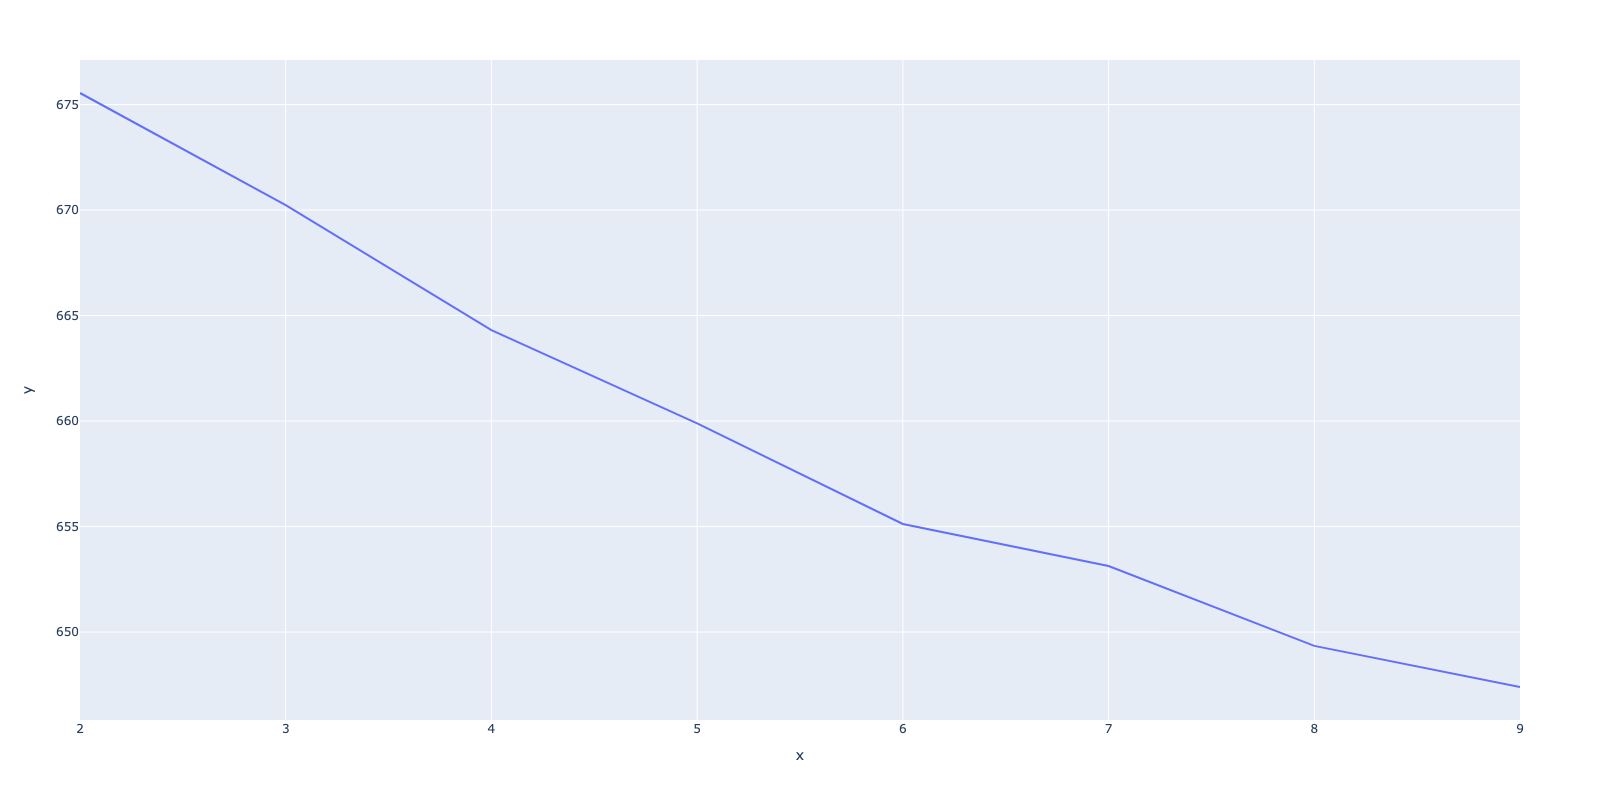

In [45]:
px.line (x=grid_cluster, y=inertia_score,  width=1600, height= 800).show("png")

# We pick 6 as our clusters.

In [46]:
optimal_cluster = 6

In [47]:
# Get clusters
MLA_params['model__n_clusters']= optimal_cluster
pipe = pipes['km']        
pipe.set_params(**MLA_params)            
pipe.fit(df_cls)

Pipeline(steps=[('prep',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('text_title1',
                                                  Pipeline(steps=[('count',
                                                                   CountVectorizer(ngram_range=(1,
                                                                                                2),
                                                                                   stop_words='english')),
                                                                  ('tfid',
                                                                   TfidfTransformer())]),
                                                  'title1')])),
                ('model',
                 KMeans(max_iter=600, n_clusters=6, n_init=10,
                        random_state=42))])

In [48]:
# Get clusters
# Get prediction/ labels
labels = pipe[1].labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
book_cl

,title,cluster
0,Becoming a Data Head How to Think Speak and Un...,5
1,Ace the Data Science Interview Real Interview...,5
2,Fundamentals of Data Engineering Plan and Buil...,3
3,Essential Math for Data Science Take Control o...,5
4,Data Science for Business What You Need to Kno...,5
5,Data Science from Scratch First Principles wit...,5
6,Practical Statistics for Data Scientists Esse...,3
7,Python for Data Science A HandsOn Introduction,5
8,Data Science For Dummies For Dummies ComputerTech,5
9,Azure Data Engineer Associate Certification Gu...,3


In [49]:
book_cl.cluster.unique()

array([5, 3, 4, 0, 2, 1], dtype=int32)

In [50]:
int(
    round(optimal_cluster+1/3, 2 )
   )

6

# Create wordclouds for clusters

/var/folders/3d/z1qzqy6s4p5_06dtsnr__3qh0000gn/T/ipykernel_87396/4246532475.py:10: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



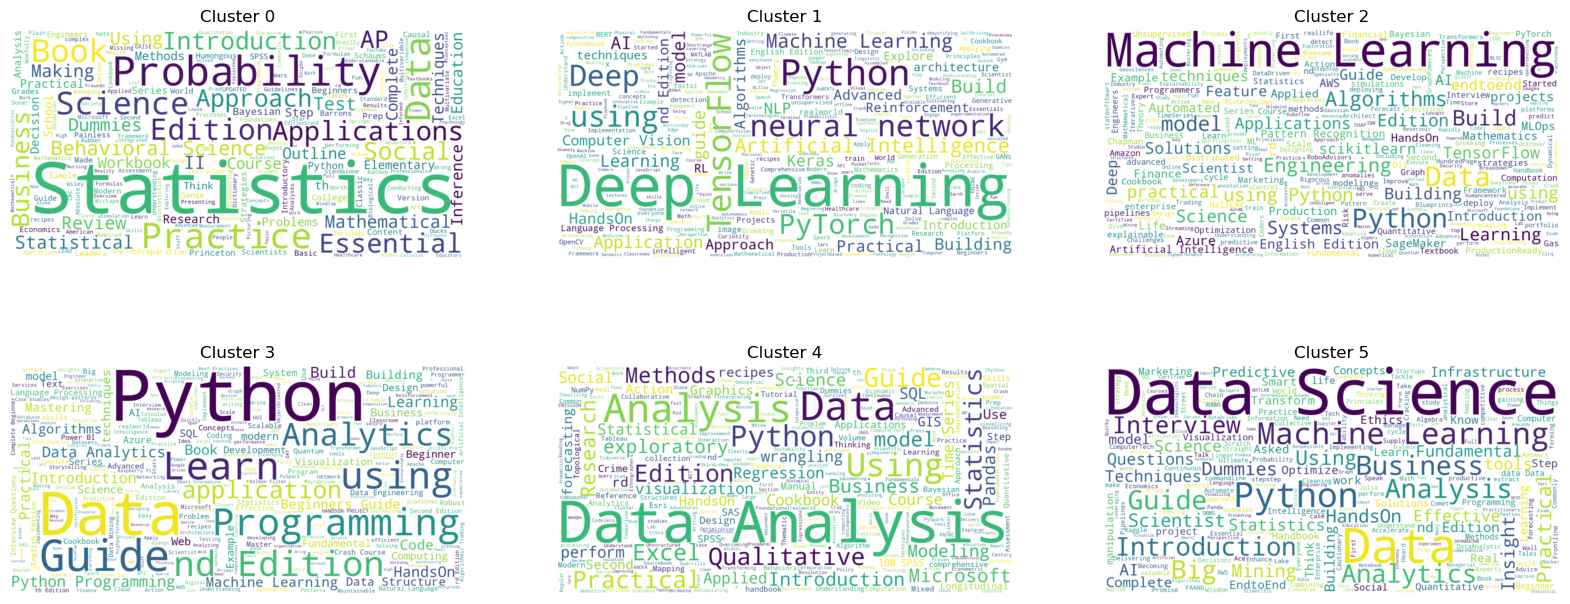

In [62]:

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize=(20, 8))

for k in range(optimal_cluster):
    text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=250, max_words= 300, background_color="white",width=1600, height=800,
                          random_state=1905).generate(text)
    # Create subplot
    plt.subplot(int(round((optimal_cluster+1)/3, 0)), 3, k+1).set_title("Cluster " + str(k)) 
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()


We can see the main catergories as high lighted in the big and bold test. 

So main clusters/categories of books are , Statistics, Deep Learning, Machine Learning, Data, Data Analysis, and Data Science. 

## Merge cluster with dataset

In [52]:
(
    pd.DataFrame(prep.fit_transform(df_cls).toarray(), columns= prep.get_feature_names_out())
    .agg(['sum'])
    .T
    .sort_values("sum", ascending = False)
    ).head(3)

,sum
text_title1__data,34.161919
text_title1__learning,30.538936
text_title1__python,23.687702


In [53]:
df['cluster'] = np.int8(labels)

In [54]:
def convert_clusters(num_of_cluster):
    if num_of_cluster == 0:
        return 'Statistics'
    elif num_of_cluster == 1:
        return 'Deep Learning'
    elif num_of_cluster == 2:
        return 'Machine Learning'
    elif num_of_cluster == 3:
        return  'Python'
    elif num_of_cluster == 4:
        return  'Data Analysis'
    elif num_of_cluster == 5:
        return 'Data Science'
    else:
        return 'Others'
        
df['types'] = df['cluster'].apply(lambda num_of_cluster:convert_clusters(num_of_cluster))

In [55]:
pd.set_option('display.max_colwidth', True)
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,publisher,title1,cluster,types
0,Becoming a Data Head How to Think Speak and Understand Data Science Statistics and Machine Learning,"Alex J. Gutman,Jordan Goldmeier",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,Wiley,Becoming Data Head How Think Speak Understand Data Science Statistics Machine Learning,5,Data Science
1,Ace the Data Science Interview Real Interview Questions Asked FAANG Tech Startups Wall Street,"Nick Singh,Kevin Huo",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,others,Ace Data Science Interview Real Interview Questions Asked FAANG Tech Startups Wall Street,5,Data Science
2,Fundamentals of Data Engineering Plan and Build Robust Data Systems,"Joe Reis,Matt Housley",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,OReilly Media,Fundamentals Data Engineering Plan Build Robust Data Systems,3,Python
3,Essential Math for Data Science Take Control of Your Data with Fundamental Linear Algebra Probability and Statistics,Thomas Nield,44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,OReilly Media,Essential Math Data Science Take Control Your Data Fundamental Linear Algebra Probability Statistics,5,Data Science
4,Data Science for Business What You Need to Know about Data Mining and DataAnalytic Thinking,"Foster Provost,Tom Fawcett",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,OReilly Media,Data Science Business What You Need Know Data Mining DataAnalytic Thinking,5,Data Science


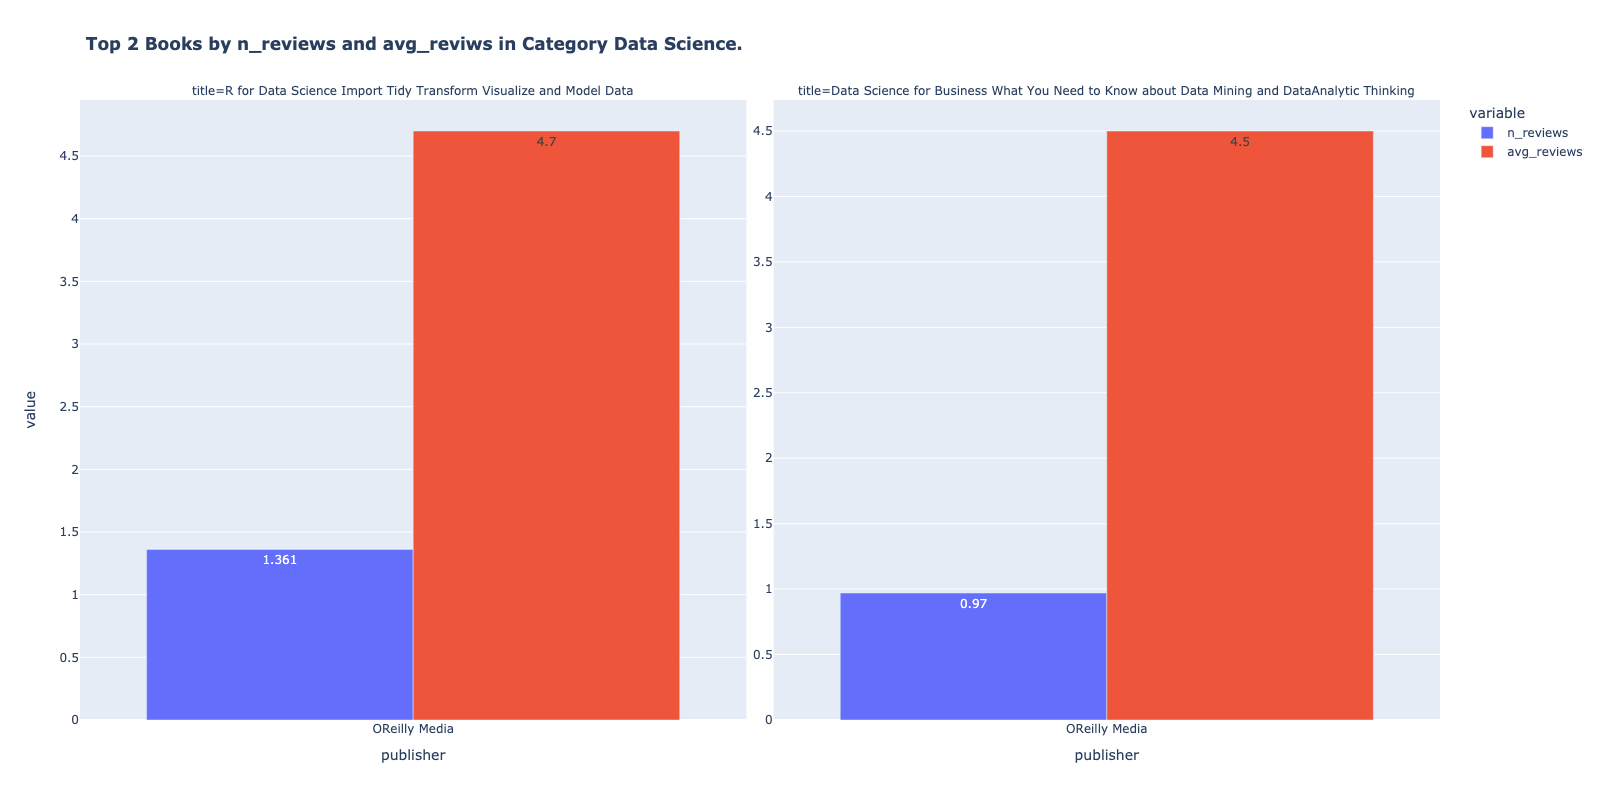

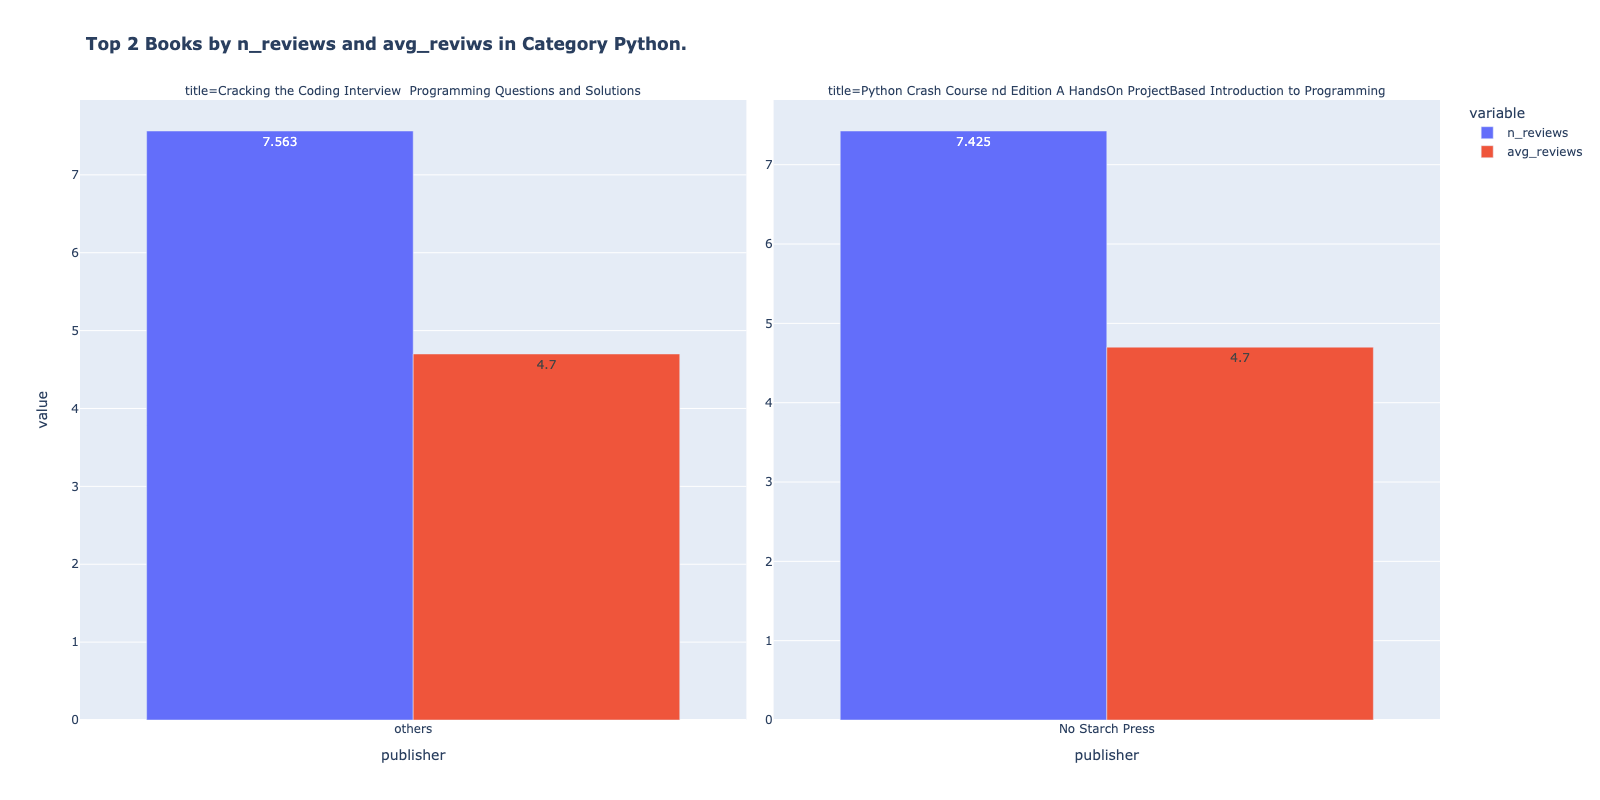

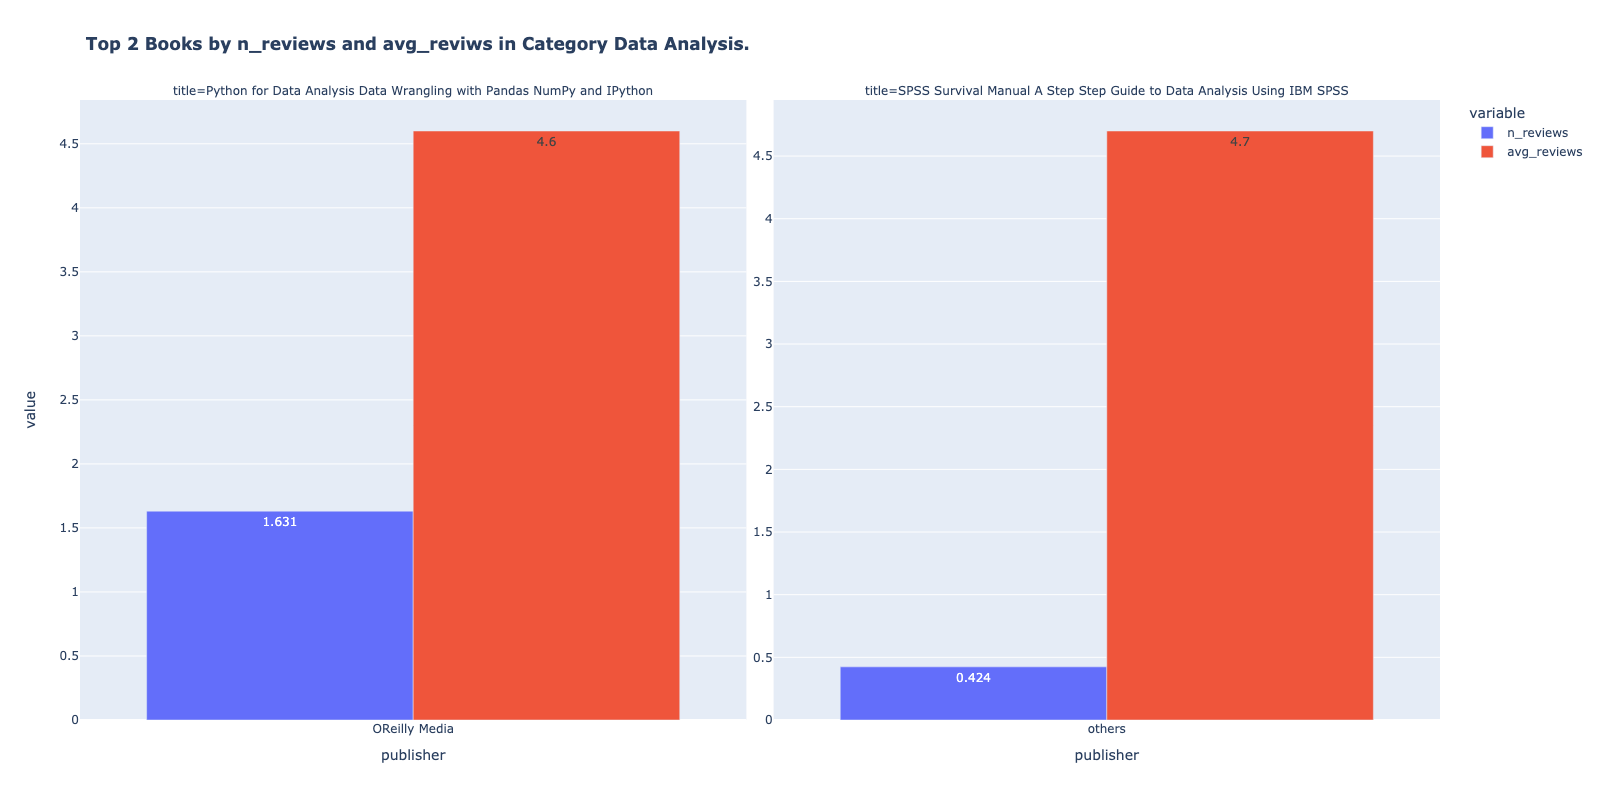

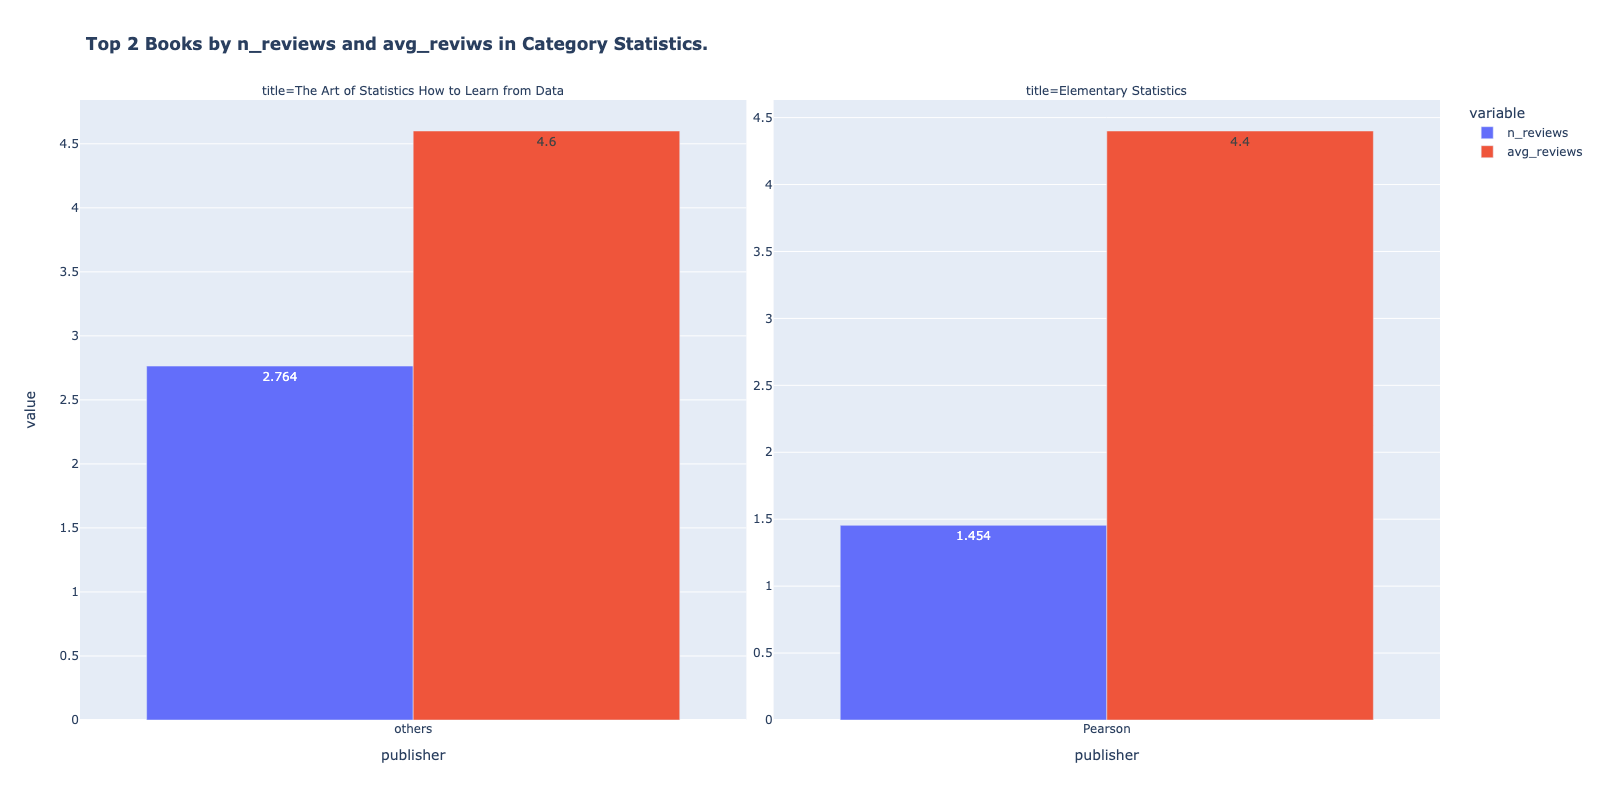

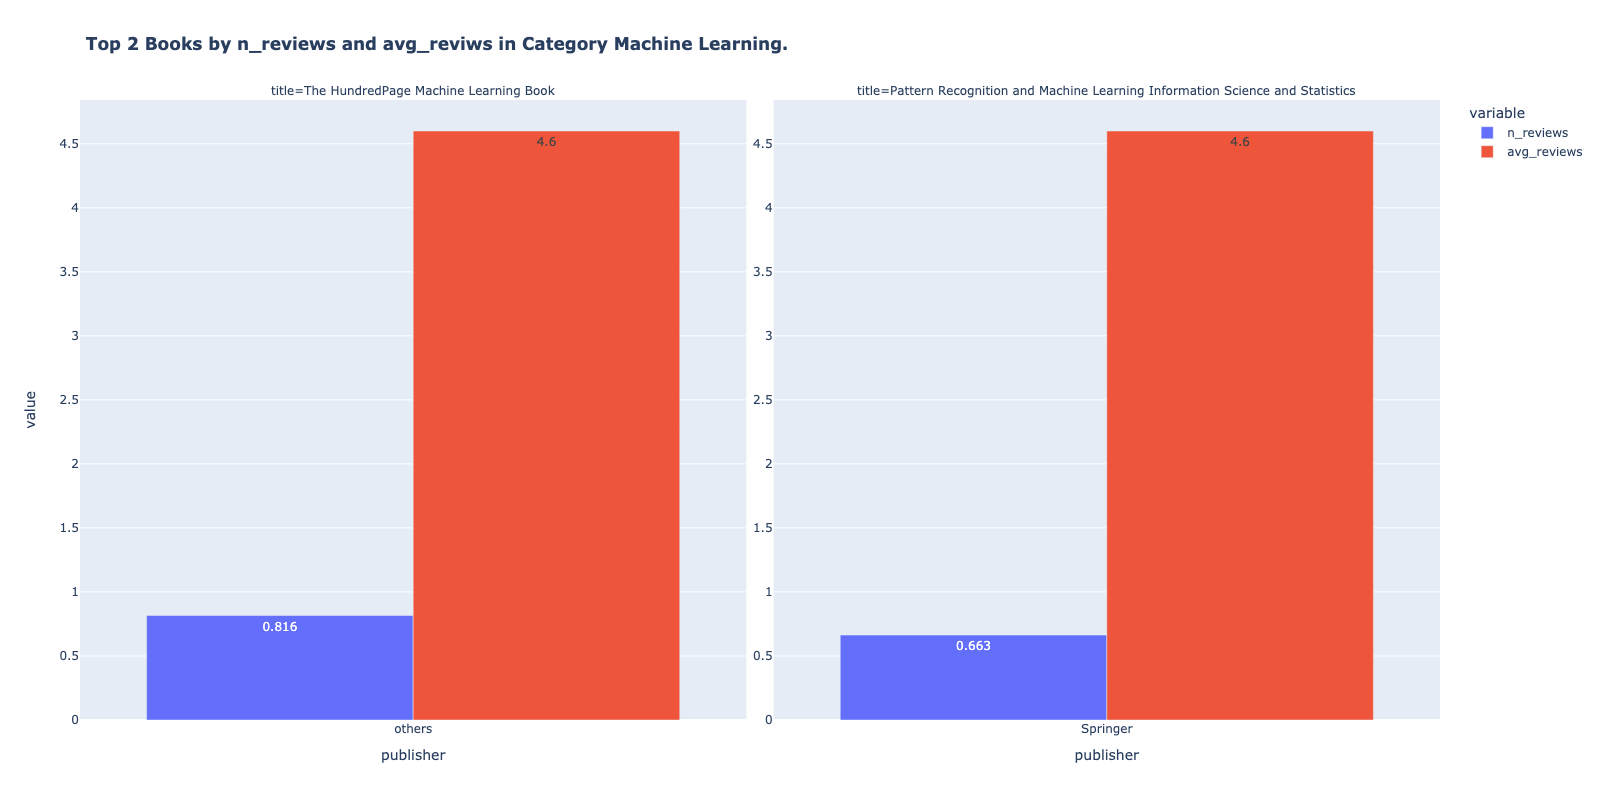

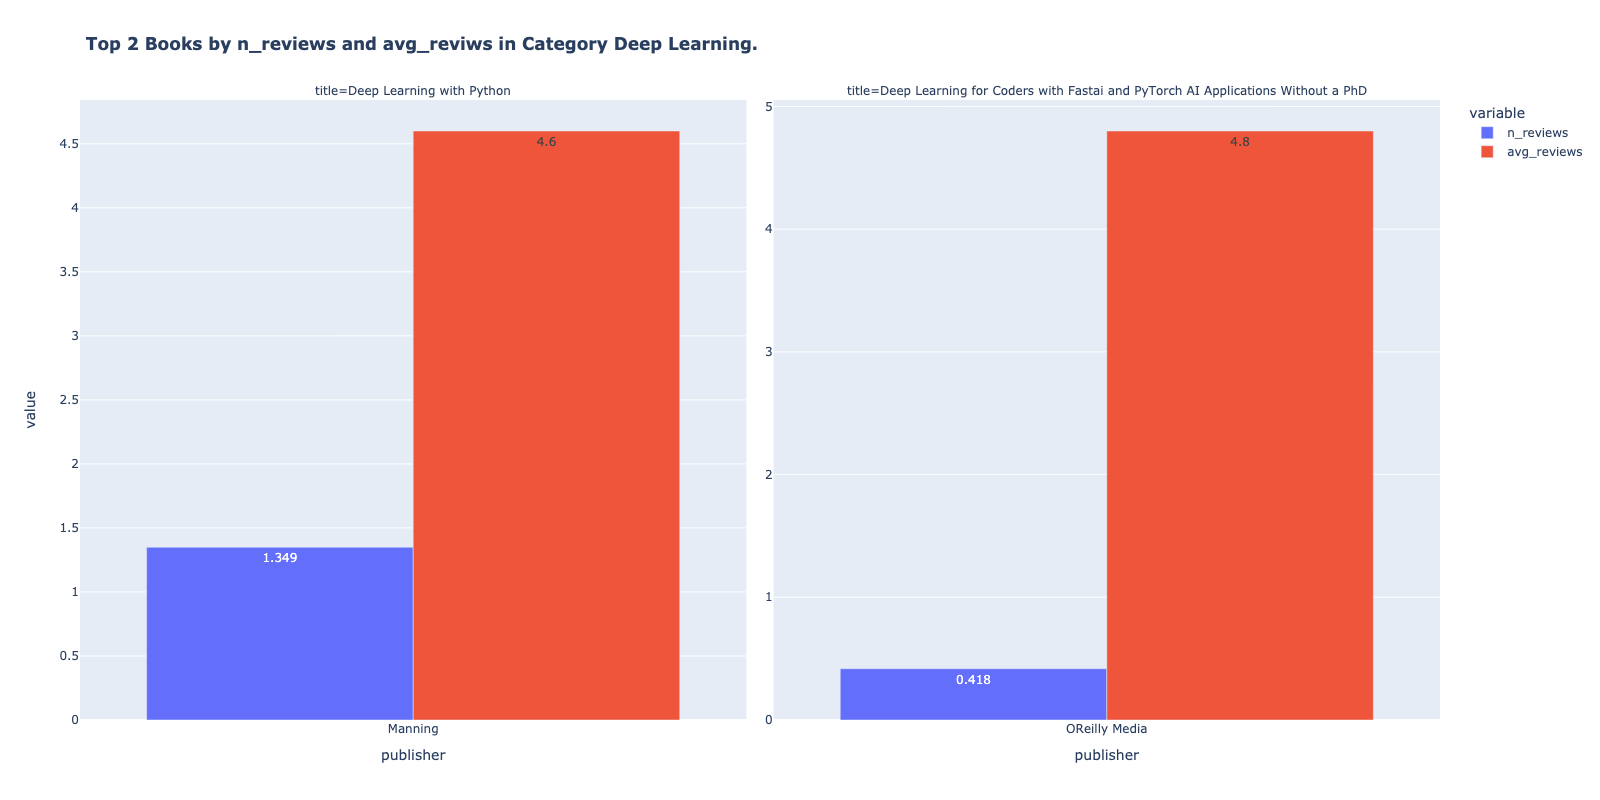

[None, None, None, None, None, None]

In [56]:

def plot_top_4_books(x):
    df_plot=(df
    .filter(items= ["types","title","n_reviews", "avg_reviews","publisher"])
    .query('types == @x ')
    .assign(n_reviews=lambda df_: df_.n_reviews/1000)
    .nlargest(2,[ "n_reviews","avg_reviews"])
    .melt(
        id_vars= ["title", "publisher","types"])    
    )


    (
        df_plot
        .plot.bar(
            x= "publisher",
            y= "value",
            barmode= "group",
            color= "variable",
            facet_col= "title",
            #facet_row = "title",
            facet_col_wrap= 2,
            text_auto = True,
            height = 800,
            width=1600,
            title= f"<b> Top 2 Books by n_reviews and avg_reviws in Category {x}.</b>"          
        )
        .update_yaxes(matches=None,showticklabels=True)
        .update_xaxes(matches=None)    
    ).show("png")

list(
    map(plot_top_4_books, df.types.unique() )
    )

# Results:
We found that the majority of books in the dataset are published by a small number of publishers. We also found that most of the books with more than 1,000 reviews have an average rating of over 4.3. Additionally, we found that the number of reviews is not necessarily correlated with the price of the book.

Using K-means clustering, we categorized the books into similar categories based on their titles. We found that the clustering algorithm was able to categorize the books into similar categories, and we obtained a Silhouette score of 0.107.

# Conclusion:
In conclusion, we successfully categorized the books from Amazon into similar categories using K-means clustering based on their titles. We also conducted exploratory data analysis and found interesting insights about the distribution of books according to their reviews, price, and pages. Finally, we concluded that K-means clustering was able to categorize the books into similar categories effectively.